# Week 6

**Kmean Clustering With Country Data**

In [ ]:
# Import required libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics

from yellowbrick.cluster import KElbowVisualizer

from collections import Counter

In [ ]:
# Import and check country dataset
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Check for null values and print metadata
print('Dataframe shape:', df.shape, '\n')
print(f'Null value count:\n{df.isnull().sum()}\n')
print(df.info())

Dataframe shape: (167, 10) 

Null value count:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [ ]:
# Display correlation between features, drop country vector as data type is object (throws exception)
df.drop('country', axis = 1).corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [ ]:
# Create dataframe from 2 columns in original dataframe
XX = df.iloc[:, [3, 5]]
# Print dataframe
print(XX)

     health  income
0      7.58    1610
1      6.55    9930
2      4.17   12900
3      2.85    5900
4      6.03   19100
..      ...     ...
162    5.25    2950
163    4.91   16500
164    6.84    4490
165    5.18    4480
166    5.89    3280

[167 rows x 2 columns]


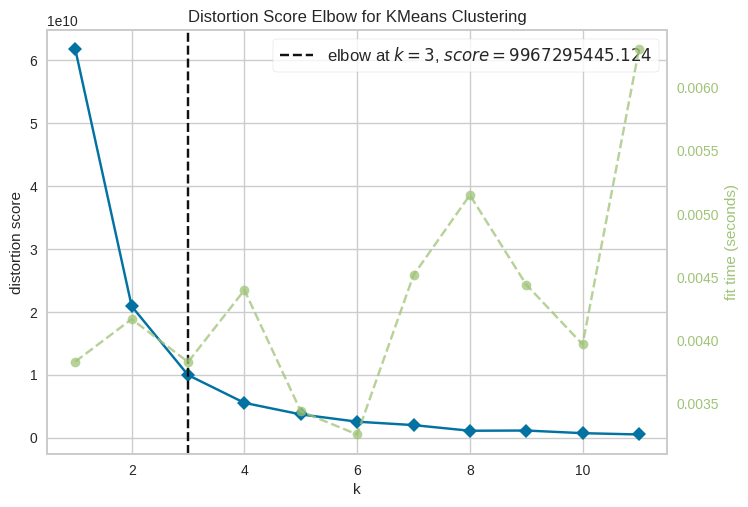

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Create temporary model to determine optimal number of clusters
model = KMeans()
visualiser = KElbowVisualizer(model, k = (1, 12)).fit(XX)
visualiser.show()

In [ ]:
# Build model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit(XX)

In [ ]:
# Show cluster asignment to rows and cluster centroids
print(f'Labels:\n{kmeans.labels_}\n')
print(f'Centroids:\n{kmeans.cluster_centers_}')

Labels:
[1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2
 2 2 1 2 1 1 1 1 0 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 2 2 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 0 2 2 1 1 2 2 1 1 1 1 2 2 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]

Centroids:
[[3.80200000e+00 8.89200000e+04]
 [6.34425197e+00 8.38553543e+03]
 [8.95685714e+00 3.86742857e+04]]


In [ ]:
# Add labels to dataframe
df['Clust_num'] = kmeans.labels_
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clust_num
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [ ]:
# Print number of entries in each cluster
print(Counter(kmeans.labels_))

Counter({np.int32(1): 127, np.int32(2): 35, np.int32(0): 5})


In [ ]:
# Create list of labels
clusters = kmeans.labels_.tolist()
# Asign refernce to centroids
centroids = kmeans.cluster_centers_
# Get validation score on clustering
clusterValid = metrics.silhouette_score(XX, clusters, metric = 'euclidean')
print('Silhouette score:', clusterValid)

Silhouette score: 0.696607038870568


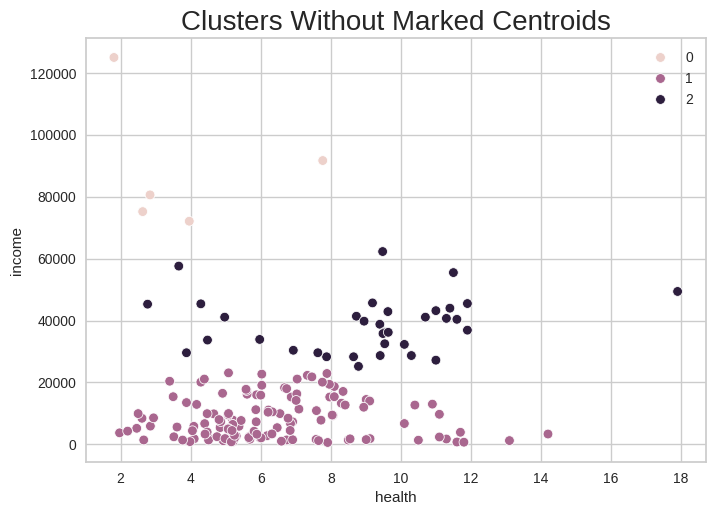

In [ ]:
# Visualise clusters (without visualising centroids)
sns.scatterplot(data = XX, x = 'health', y = 'income', hue = kmeans.labels_)
plt.title('Clusters Without Marked Centroids', fontsize = 20)
plt.show()

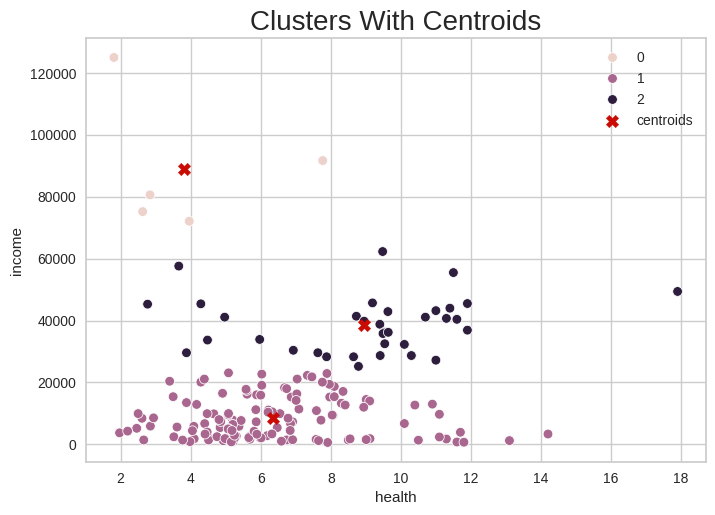

In [ ]:
# Visualise clusters and their centroids
sns.scatterplot(data = XX, x = 'health', y = 'income', hue = kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.legend()
plt.title('Clusters With Centroids', fontsize = 20)
plt.show()

In [ ]:
# Predict cluster of new data
newData = [[85.89, 30400], [10, 10000], [15, 1700], [3, 6000]]
newDf = pd.DataFrame(newData, columns = ['health', 'income'])
pred_clust = kmeans.predict(newDf)

print(f'New data:\n{newDf}\n')
print('Predictions:', pred_clust)

New data:
   health  income
0   85.89   30400
1   10.00   10000
2   15.00    1700
3    3.00    6000

Predictions: [2 1 1 1]


**Kmean Clustering With Diabetes Data**

In [ ]:
# Load data and display for understanding
df = pd.read_csv('diabetesN.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Show null values and display metadata
print(f'Dataframe shape: {df.shape}\n')
print(f'Null values:\n{df.isnull().sum()}\n')
print(df.info())

Dataframe shape: (768, 9)

Null values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome          

In [ ]:
# Display correlation data
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Drop outcome, we don't need it for clustering (unsupervised)
df = df.drop('Outcome', axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# I want to use PCA to reduce feature dimensions to 2.
# I learned that PCA is sensitive to large ranges and it is recommended to standardise the data
from sklearn.preprocessing import StandardScaler

standard_df = StandardScaler().fit_transform(df)

# Perform PCA after standardisation
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
p_comps = pca.fit_transform(standard_df)
pca_df = pd.DataFrame(data = p_comps, columns = ['Principal_comp_1', 'Principal_comp_2'])
pca_df.head()

,Principal_comp_1,Principal_comp_2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


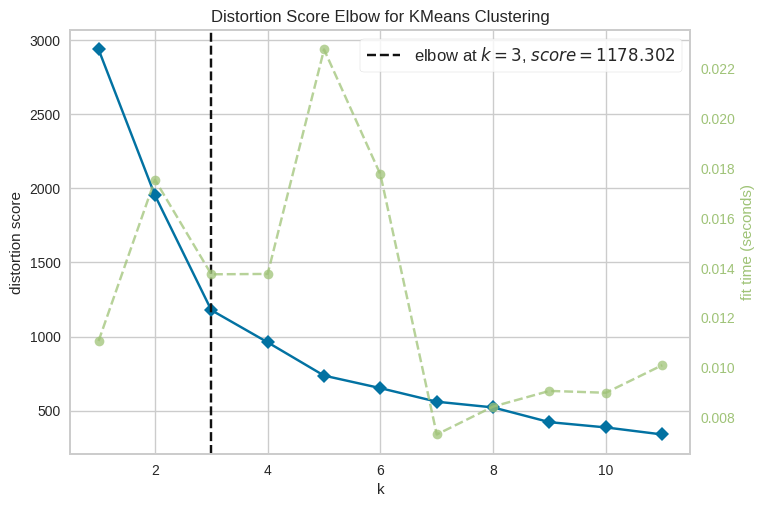

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Determine optimal number of clusters using elbow method
tmp_model = KMeans()
KElbowVisualizer(tmp_model, k = (1, 12)).fit(pca_df).show()

In [ ]:
# Create model with recommended number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1).fit(pca_df)

In [ ]:
# Display cluster labels, centroids, and allocation
cluster_nums = kmeans.labels_
centroids = kmeans.cluster_centers_

print(f'Cluster Labels:\n{cluster_nums}\n')
print(f'Cluster Centroids:\n{centroids}\n')
print(f'Cluster Allocation:\n{Counter(cluster_nums)}')

Cluster Labels:
[1 2 1 2 0 2 2 2 0 1 1 1 1 0 1 2 0 1 2 0 0 1 1 1 1 1 1 2 1 1 1 0 2 2 1 0 1
 1 2 0 0 1 1 1 1 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 2 1 2 0 1 2 0 1 2 0 2 0 1 0
 2 2 1 2 2 2 2 2 1 2 1 0 1 2 1 2 2 0 0 1 2 0 2 2 2 0 0 2 2 2 2 0 2 0 2 2 0
 0 2 2 0 1 1 2 2 2 0 2 2 1 2 0 0 2 0 1 1 1 0 1 2 2 2 2 2 0 1 1 2 1 0 2 1 0
 1 2 0 2 1 0 1 0 2 2 2 1 1 1 0 2 2 1 2 2 2 2 1 0 2 0 2 0 1 0 1 1 2 2 2 2 1
 1 0 0 0 0 2 1 1 1 1 0 2 2 0 0 2 2 2 2 1 2 1 1 2 1 2 0 1 0 1 0 0 0 2 1 0 1
 2 1 2 2 2 0 0 0 0 0 2 2 2 1 1 0 1 2 2 2 2 0 0 1 1 0 0 2 1 2 2 2 1 2 2 2 0
 1 1 2 2 1 2 1 2 0 2 2 0 2 1 2 1 0 2 2 1 2 2 1 1 1 1 1 0 0 2 0 2 0 0 0 1 0
 0 0 1 1 2 0 2 1 1 0 1 2 0 0 2 0 2 2 1 2 2 1 0 1 2 2 2 1 2 2 0 1 0 1 1 2 2
 1 2 0 2 1 0 1 2 2 2 1 1 1 2 2 2 2 2 1 2 2 2 1 0 1 1 0 0 1 1 1 0 2 2 2 2 0
 0 2 2 2 0 1 2 2 1 0 0 2 2 2 2 2 1 1 1 2 0 1 0 2 1 0 2 2 2 0 2 1 0 1 1 0 1
 2 1 0 0 0 0 2 0 0 2 0 2 2 0 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 1 1 2 1 0 2 2 1
 2 0 2 0 2 2 2 2 0 1 2 1 1 2 0 1 1 2 1 2 1 2 2 0 2 0 0 2 2 1 2 1 0 1 1 1 0
 0 2 0 2 

In [ ]:
# Append cluster label data to dataframe
pca_df['Cluster_num'] = cluster_nums
pca_df.head(10)

,Principal_comp_1,Principal_comp_2,Cluster_num
0,1.068503,1.234895,1
1,-1.121683,-0.733852,2
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,2
4,2.359334,-2.184819,0
5,-1.435751,0.835577,2
6,-0.930176,-1.107940,2
7,-2.149806,0.855902,2
8,3.297925,-0.242155,0
9,-1.839850,3.206661,1


In [ ]:
# Print silhouette score
cluster_valid = metrics.silhouette_score(pca_df, cluster_nums.tolist(), metric = 'euclidean')
print('Silhouette Score: {:.2f}'.format(cluster_valid))

Silhouette Score: 0.49


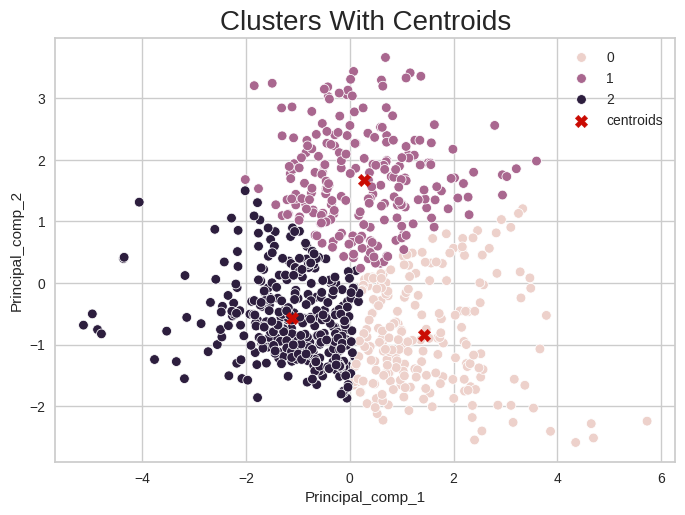

In [ ]:
# Display clusters and centroids on scatterplot
sns.scatterplot(pca_df, x = 'Principal_comp_1', y = 'Principal_comp_2', hue = cluster_nums)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.legend()
plt.title('Clusters With Centroids', fontsize = 20)
plt.show()

In [ ]:
# I wanted to understand how the features were related to principal components
# I learned that the pca object is able to tell me the 'loadings' of each feature
# Create and display dataframe of pca components
loadings = pd.DataFrame(pca.components_.T, columns = ['Principal_comp_1', 'Principal_comp_2'], index = df.columns)
display(loadings)

,Principal_comp_1,Principal_comp_2
Pregnancies,0.128432,0.593786
Glucose,0.393083,0.174029
BloodPressure,0.360003,0.183892
SkinThickness,0.439824,-0.331965
Insulin,0.435026,-0.250781
BMI,0.451941,-0.100960
DiabetesPedigreeFunction,0.270611,-0.122069
Age,0.198027,0.620589


**Reflection**

For this week, I learned to apply unsupervised learning (clustering) in python. I used 2 different datasets, countires and diabetes, and appliead kmeans clustering to identify clusters/potential targets.

For the countries dataset, I first used the elbow method to determine the optimal number of clusters. Next, I built the model with 3 clusters from the health and income colmuns, calculated the silhouette score, and visually displayed the clusters and centroids on a scatterplot. The silhouette score of 0.69 indicates a fairly good numbering of clusters.

For the diabetes dataset, I followed a similar set of steps but differed with the use of PCA. I learned to standardise the data before fitting it to an instance of the PCA. I used PCA to reduce the dimensons whilst keeping as much of the feature data as possible. The silhouette was lower than the first example, indicating a weaker chosen number of clusters.

After displaying the data on a scatterplot, I wanted to understand how the x and y axis related to each feature. I learned to use the loading concept from the PCA instance. Principal componenet 1 was primarily influnced by insluin, BMI, skin thickness, glucose, and blood pressure. Principal component 2 was primarily influnced by age and pregnancies. One example of an interpretation from the graph is that those with higer age and pregancies typically belonged in cluster 1.